## Sales and market share analysis of TRx & NBRx of biopharma organization

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `df`.

In [4]:
df = pd.read_csv(r'Complex_TRx_NRx_TCL_Data.csv',sep=',') # Write your code for importing the csv file here
df.head()

,Date,Drug Name,Drug Category,Therapeutic Class,Prescriber ID,Patient ID,Age,Gender,Insurance Status,Region,Sales Channel,TRx,NRx,TCL,Market Share (%),Prescription Cost ($),Revenue ($)
0,2023-05-26,DrugC,Branded,Neurology,e289faec-8906-4335-b7bc-b07510bc6afe,4e0b918e-2c91-45d2-b5f6-84a0476a6c87,76,Female,Insured,South,Telemedicine,5,0,36,6.14,334.98,823.16
1,2022-12-26,DrugC,Generic,Cardiovascular,ec6c88bb-ae71-4a9c-89fd-5112df1e7f5a,c3552fa4-a214-4836-87f2-9e5ed53b29be,71,Male,Uninsured,South,Telemedicine,4,1,50,2.08,434.46,114.64
2,2022-12-20,DrugA,Branded,Endocrinology,25b71e89-8968-462d-a3c7-95e9648f2f17,7791d7fd-3cdf-4aa9-b9d6-1d233a02a014,59,Female,Uninsured,Midwest,E-Prescription,1,2,53,8.00,450.48,185.49
3,2024-07-31,DrugB,Branded,Neurology,f66e17bd-7ab1-4586-8a45-6d3229c41224,33126da1-4883-486d-b0d2-a805864363ca,22,Female,Uninsured,West,In-Person,3,2,34,4.28,116.69,387.39
4,2023-09-30,DrugD,Branded,Endocrinology,46a2ae29-8b07-42b7-bf3b-3a2a82445b07,5f97dcee-336b-4b94-a9b1-275a2c8f3be9,28,Female,Insured,Northeast,E-Prescription,9,3,59,3.07,292.84,976.60


In [5]:
print(df.shape)
print(df.info())
print(df.dtypes)

(2000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2000 non-null   object 
 1   Drug Name              2000 non-null   object 
 2   Drug Category          2000 non-null   object 
 3   Therapeutic Class      2000 non-null   object 
 4   Prescriber ID          2000 non-null   object 
 5   Patient ID             2000 non-null   object 
 6   Age                    2000 non-null   int64  
 7   Gender                 2000 non-null   object 
 8   Insurance Status       2000 non-null   object 
 9   Region                 2000 non-null   object 
 10  Sales Channel          2000 non-null   object 
 11  TRx                    2000 non-null   int64  
 12  NRx                    2000 non-null   int64  
 13  TCL                    2000 non-null   int64  
 14  Market Share (%)       2000 non-null   float6

## Task 3: Data Analysis

-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `Revenue($)` and `Prescription Cost($)`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `Revenue($)` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [12]:
# Code for creating the profit column here
df['profit']=round(df['Revenue ($)'].sub(df['Prescription Cost ($)'],axis=0),0)
df.head()

,Date,Drug Name,Drug Category,Therapeutic Class,Prescriber ID,Patient ID,Age,Gender,Insurance Status,Region,Sales Channel,TRx,NRx,TCL,Market Share (%),Prescription Cost ($),Revenue ($),profit
0,2023-05-26,DrugC,Branded,Neurology,e289faec-8906-4335-b7bc-b07510bc6afe,4e0b918e-2c91-45d2-b5f6-84a0476a6c87,76,Female,Insured,South,Telemedicine,5,0,36,6.14,334.98,823.16,488.0
1,2022-12-26,DrugC,Generic,Cardiovascular,ec6c88bb-ae71-4a9c-89fd-5112df1e7f5a,c3552fa4-a214-4836-87f2-9e5ed53b29be,71,Male,Uninsured,South,Telemedicine,4,1,50,2.08,434.46,114.64,-320.0
2,2022-12-20,DrugA,Branded,Endocrinology,25b71e89-8968-462d-a3c7-95e9648f2f17,7791d7fd-3cdf-4aa9-b9d6-1d233a02a014,59,Female,Uninsured,Midwest,E-Prescription,1,2,53,8.00,450.48,185.49,-265.0
3,2024-07-31,DrugB,Branded,Neurology,f66e17bd-7ab1-4586-8a45-6d3229c41224,33126da1-4883-486d-b0d2-a805864363ca,22,Female,Uninsured,West,In-Person,3,2,34,4.28,116.69,387.39,271.0
4,2023-09-30,DrugD,Branded,Endocrinology,46a2ae29-8b07-42b7-bf3b-3a2a82445b07,5f97dcee-336b-4b94-a9b1-275a2c8f3be9,28,Female,Insured,Northeast,E-Prescription,9,3,59,3.07,292.84,976.60,684.0


In [15]:
# Write your code for sorting the dataframe here
df.sort_values(by='profit',ascending=False)
df.head(5)

,Date,Drug Name,Drug Category,Therapeutic Class,Prescriber ID,Patient ID,Age,Gender,Insurance Status,Region,Sales Channel,TRx,NRx,TCL,Market Share (%),Prescription Cost ($),Revenue ($),profit
0,2023-05-26,DrugC,Branded,Neurology,e289faec-8906-4335-b7bc-b07510bc6afe,4e0b918e-2c91-45d2-b5f6-84a0476a6c87,76,Female,Insured,South,Telemedicine,5,0,36,6.14,334.98,823.16,488.0
1,2022-12-26,DrugC,Generic,Cardiovascular,ec6c88bb-ae71-4a9c-89fd-5112df1e7f5a,c3552fa4-a214-4836-87f2-9e5ed53b29be,71,Male,Uninsured,South,Telemedicine,4,1,50,2.08,434.46,114.64,-320.0
2,2022-12-20,DrugA,Branded,Endocrinology,25b71e89-8968-462d-a3c7-95e9648f2f17,7791d7fd-3cdf-4aa9-b9d6-1d233a02a014,59,Female,Uninsured,Midwest,E-Prescription,1,2,53,8.00,450.48,185.49,-265.0
3,2024-07-31,DrugB,Branded,Neurology,f66e17bd-7ab1-4586-8a45-6d3229c41224,33126da1-4883-486d-b0d2-a805864363ca,22,Female,Uninsured,West,In-Person,3,2,34,4.28,116.69,387.39,271.0
4,2023-09-30,DrugD,Branded,Endocrinology,46a2ae29-8b07-42b7-bf3b-3a2a82445b07,5f97dcee-336b-4b94-a9b1-275a2c8f3be9,28,Female,Insured,Northeast,E-Prescription,9,3,59,3.07,292.84,976.60,684.0


## Marekt Share Analysis

In [20]:
# Clustering based on Market Share and Revenue
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Market Share (%)', 'Revenue ($)']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

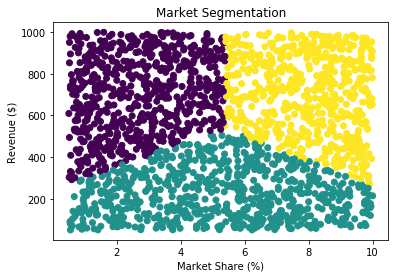

In [25]:
# Visualize clusters
plt.scatter(df['Market Share (%)'], df['Revenue ($)'], c=df['Cluster'])
plt.xlabel('Market Share (%)')
plt.ylabel('Revenue ($)')
plt.title('Market Segmentation')
plt.show()

### Yellow Cluster:

Represents the highest market share and revenue segment.
This cluster likely includes the top-performing products or services with dominant market presence and significant revenue contributions.

### Purple Cluster:

This segment shows a lower market share but can have varied revenue levels.
Products in this cluster may be niche or specialized offerings with targeted but smaller customer bases.

### Teal Cluster:

Indicates moderate market share with consistent revenue patterns.
This cluster might include well-established products that maintain steady performance but don't dominate the market.

## Sales Performance Analysis

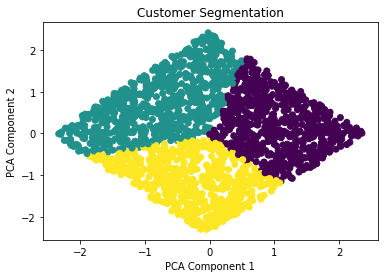

In [23]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation')
plt.show()

### Segmentation:

The plot displays three distinct clusters, color-coded to match the original segmentation (as seen in the earlier clustering analysis).<br>

<li>Yellow Cluster: Positioned mainly in the lower left, it might represent customers with certain demographic or behavioral characteristics.</li><br>

<li>Purple Cluster: Clustered in the upper right, it likely represents a different group with distinct traits compared to the yellow cluster.</li><br>

<li>Teal Cluster: Positioned between the yellow and purple clusters, this group might share some traits with both but remains a separate segment.</li>

Inferences:<br><ol>
<li>Customer Distinction: The PCA plot confirms that customers can be segmented into distinct groups based on underlying patterns in the data. Each cluster represents customers who are similar in terms of the attributes reduced to these two components.</li>
Interpretation of Components:<br><br>

<li>PCA Component 1 and PCA Component 2 represent the new axes that capture the largest variations in the data. The specific meaning of these components would depend on the original features, but they typically capture the most significant factors that differentiate customer behavior.</li><br>

For example, Component 1 might relate to a combination of market share and revenue, while Component 2 could capture variations due to demographic factors.

In [ ]:
## Market Basket Analysis using Apriori algorithm

In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert data to a format suitable for market basket analysis
basket_data = df.pivot_table(index='Patient ID', columns='Drug Name', values='TRx', aggfunc='sum').fillna(0)
basket_data = basket_data.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

C:\Users\suchi\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:113: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
